## Rukovanje podatcima


In [21]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn


### Učitavanje podataka

In [4]:
# Učitavanje podataka
df = pd.read_csv("data/heart_disease_uci.csv")

#### Početni pregled podataka

In [6]:
# Prikaz dimenzija dataframea
df.shape

(920, 16)

In [7]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [15]:
# Prikaz svih podataka 
#with pd.option_context("display.max_rows", None, 'display.max_columns', None):
#    display(df)

In [8]:
df.columns.values

array(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'num'], dtype=object)

Pojašnjenja značajki:
- id - ID osobe, tj. primjera 
- age - starost osobe
- sex - spol osobe
- cp - razina boli u prsima (0, 1, 2, 3)
- trestbps - tlak osobe kad je primljena u bolnicu
- chol - razina kolesterola osobe kada je primljena u bolnicu
- fbs - razina šećera u krvi (0, 1)
- restecg - rezultat EKG-a (0, 1, 2)
- thalch - maksimalna vrijednost otkucaja srca zabilježena tijekom primitka u bolnicu
- exang - izaziva li vježba anginu (0, 1)
- oldpeak - stanje depresije
- slope - stanje pacijenta tijekom najveće fizičke aktivnosti/napora
- ca - prikaz rezultata fluoroskopije, koliko su žile obojene (0, 1, 2, 3)
- thal - rezultat testa na talij (0, 1, 2, 3)
- num - značajka oznake/klase


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [18]:
# Opis numeričkih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [19]:
# Opis svih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe(include = 'all')

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


#### Monotoni atributi

In [11]:
# Provjera postoje li monotoni atributi, čija vrijednost jednoliko raste
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

Iz ovog prikaza, može se zaključiti da je id monotoni atribut, zbog čega ga možemo izbaciti iz skupa podataka. 

In [12]:
df.drop('id', axis = 1, inplace=True)

#### Nedostajajući podatci 

In [13]:
# Provjera koliko je nedostajajućih podataka
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [20]:
# Postotak nedostajajućih vrijednosti
round((df.isna().sum() / len(df))*100,2)

age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

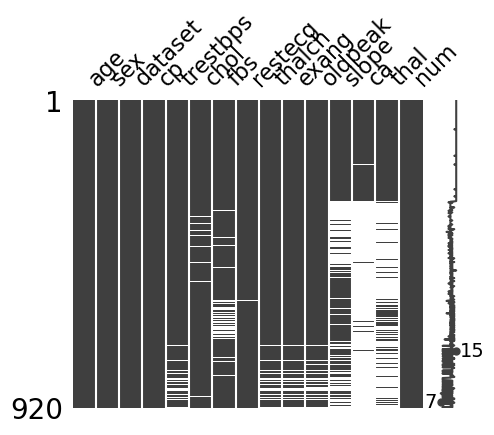

In [23]:
mn.matrix(df,figsize=(5,4));

U idealnom slučaju rješenje za nedostajujuće podatke bilo bi pronalazak točnih vrijednosti iz drugih izvora, međutim, to ovdje nije opcija. Zato ćemo se poslužiti drugim metodama.

U slučaju značajke **trestbps**:
- značajka ima numeričku vrijednost tako da možemo nedostajajuće vrijednosti zamijeniti srednjom vrijednosti
- izbacivanjem tih zapisa gubimo oko 6,5% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, krvni tlak važan je faktor u predviđanju zatajenja srca
- interpolacija nema baš smisla 

In [ ]:
sns.distplot(df.trestbps)

U slučaju značajke **chol**:
- značajka ima numeričku vrijednost tako da možemo nedostajajuće vrijednosti zamijeniti srednjom vrijednosti
- izbacivanjem tih zapisa gubimo oko 3,3% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, kolesterol je važan faktor u predviđanju zatajenja srca
- interpolacija nema smisla

In [ ]:
sns.distplot(df.chol)

U slučaju značajke **fbs**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo binarne vrijednosti (0 ili 1)
- izbacivanjem tih zapisa gubimo oko 10% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, razina šećera je važan faktor u predviđanju zatajenja srca
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom 

U slučaju značajke **restecg**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednost 0, 1 ili 2
- izbacivanjem tih zapisa gubimo manje od 1% podataka, a budući da u ovom slučaju izgleda kao da su to MAR/MCAR podatci, najbolja opcija je izbrisati ove zapise.
- izbacivanje značajke nije moguće, ekg je ključan faktor u predviđanju zatajenja srca
- interpolacija nema smisla

U slučaju značajke **thalch**:
- značajka je numerička tako da nedostajajuće vrijednosti možemo zamijeniti srednjom vrijednošću podataka
- izbacivanjem tih zapisa gubimo oko 6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- izbacivanje značajke nije moguće, otkucaji srca važan su faktor u predviđanju zatajenja srca
- interpolacija nema smisla

In [ ]:
sns.distplot(df.thalch)

U slučaju značajke **exang**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo binarne vrijednosti (0 ili 1)
- izbacivanjem tih zapisa gubimo oko 6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da su angine predstadij infarkta, ne možemo izbaciti ovu značajku
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom 

U slučaju značajke **oldpeak**:
- značajka je numerička tako da nedostajajuće vrijednosti možemo zamijeniti srednom vrijednosti podataka
- izbacivanjem tih zapisa gubimo oko 6,8% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- značajka nije ključna za previđanje zatajenja srca pa ju je moguće i izbaciti
- interpolacija nema smisla

In [ ]:
sns.distplot(df.oldpeak)

U slučaju značajke **slope**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima vrijednosti 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 33,6% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da ljudi sa zatajenjem srca puno gore podnose napore, ovo je važna značajka koju ne bi bilo pametno izbaciti
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom

U slučaju značajke **ca**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednosti 0, 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 66,5% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- s obzirom da se ovim putem može vidjeti začepljenje krvnih žila, značajka je jako bitna, ali u našem slučaju, uz više od 66% nedostajajućih podataka, možda je moguća i uspješna predikcija bez nje
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom, ali uz upitnu uspješnost s obzirom na malen broja podataka koji imamo dostupan za treniranje

U slučaju značajke **thal**:
- ovdje nedostajajuće vrijednosti ne možemo zamijeniti srednjom vrijednosti budući da značajka poprima samo vrijednosti 0, 1, 2, 3
- izbacivanjem tih zapisa gubimo oko 53% podataka, također, to nije opcija ako podatci nisu MAR (Missing At Random) ili MCAR (Missing Completely At Random)
- kao i kod značajke **ca**, s obzirom na broj nedostajajućih vrijednosti, možda je bolje izbaciti ovu značajku iako ima velik utjecaj na procjenu zatajenja srca 
- interpolacija nema smisla
- ovdje možemo nedostajajuće podatke zamijeniti najčešće korištenom vrijednošću ove značajke, predvidjeti linearnom regresijom ili KNN metodom, također uz upitnu korisnost/uspješnost s obzirom na malen skup podataka za treniranje modela

Nakon razmatranja individualnih značajki, a zatim i njihove usporedbe na grafu, moguće je uočiti da značajke **trestbps**, **thalch**, **exang** i **oldpeak** imaju skoro jednak broj nedostajajućih značajki na istim mjestima, zbog čega je možda najbolje rješenje izbaciti te zapise.
